How to use bootstrapping on polling data to estimate the confidence interval that voters give the candidate a passing grade (more than 5)

In [5]:
import math
import io


In [6]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

import scipy.stats as sp
import scipy.optimize
import scipy.spatial

%matplotlib inline



In [7]:
pop = pd.read_csv('grades.csv')

In [8]:
pop

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912
...,...
95,3.940691
96,9.120705
97,7.842357
98,3.920676


In [9]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


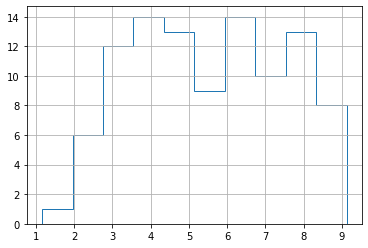

In [11]:
pop.grade.hist(histtype= 'step')

In [12]:
sp.percentileofscore(pop.grade, 5)

43.0

cant build confience interval by sampling the distrubution because we do not know how to describe it. First estimate the uncertainty of our statistic in this case the mean in a large family of samples. Creat other distributions via sampling with replacement. 

In [19]:
pop.sample(100,replace=True).describe()

,grade
count,100.000000
mean,5.290655
std,1.964835
min,1.160899
25%,3.620426
50%,5.085034
75%,6.852405
max,8.522332


Use a python list comprehension 

In [25]:
bootstrap = pd.DataFrame({'passperc':[sp.percentileofscore(pop.sample(100,replace=True), 5) for i in range(1000)]})

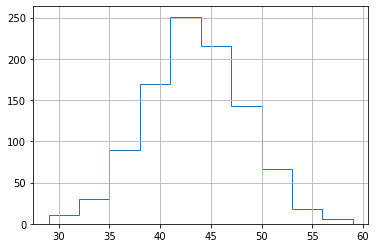

In [26]:
bootstrap.passperc.hist(histtype='step')

In [27]:
bootstrap.passperc.quantile(0.025),bootstrap.passperc.quantile(0.975)

(33.0, 52.0)